In [1]:
load data001_2014.mat

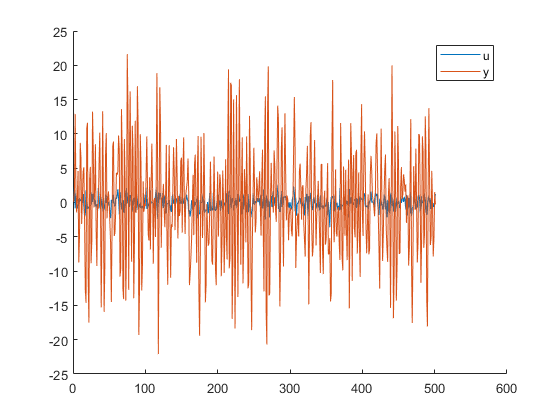

In [2]:
hold on

plot(u)
plot(y)
hold off
%plot(y)
legend(["u","y"])

对于 Controled Auto regression moving average (CARMA)模型，其即在ARMA模型中加入了控制项$u_i$，如:

$$
A(q^{-1}) y(k) = B(q^{-1}) u(k) + C(q^{-1}) \xi(k)
$$

使用OLS或RLS显然是不可行的，因为噪声$\xi(k)$并不是可观测的，即使无视它直接估计前面两组系数，此设定错误导致有偏也是自然的事情。
RELS（recursive extended least square,增广矩阵法）则可以解决这一问题。它在递推基础上同时估计$\xi(k)$的值加入下一轮迭代：

回忆RLS的形式:

$$
\begin{align*}
\hat{\theta}(N+1) &=  \hat{\theta}(N) + K(N+1)(y(N+1)-x^T(N+1) \hat{\theta}(N)) \\
P(N+1) &= \frac{1}{\rho} (I - K(N+1) x^T(N+1)) P(N) \\
K(N+1) &=  \frac{P(N)x(N+1)}{\rho+x^T(N+1)P(N)x(N+1)}
\end{align*}
$$

我们把所有$x(k)$改成增补了噪声估计值的“数据”$\hat{x}(k) = (-y(k-1),\dots,-y_{k-n_a},u(k),\dots,u(k-n_b),\dots,\xi(k),\dots,\xi(k-n_c))$

$$
\begin{align*}
\hat{\theta}(N+1) &=  \hat{\theta}(N) + K(N+1)(y(N+1)-\hat{x}^T(N+1) \hat{\theta}(N)) \\
P(N+1) &= \frac{1}{\rho} (I - K(N+1) \hat{x}^T(N+1)) P(N) \\
K(N+1) &=  \frac{P(N)\hat{x}(N+1)}{\rho + \hat{x}^T(N+1)P(N)\hat{x}(N+1)} \\
\hat{\xi}(N+1) &= y(N+1) - x^T(N+1) \hat{\theta}(N)
\end{align*}
$$

三个状态初始值（$K$只是中间变量）$\hat{\theta},P,\xi$取为:

$$
\begin{align*}
\hat{\theta}(k) &= 10^{-3} (1,\dots,1)^T \\
P(k) &= 10^6 \mathbf{I} \\
\hat{\xi}(k) &= y(k)
\end{align*}
$$

In [3]:
n_a = 2;
n_b = 2;
n_c = 1;

num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;

In [4]:
rho = 0.99;

In [5]:
for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end

In [6]:
help rels

  Recursive extended least square 
  CARMA model: A(q^{-1}) y(k) = B(q^{-1}) u(k) + C(q^{-1}) \xi(k)
  "extended" data: $\hat{x}(k) = (-y(k-1),\dots,-y_{k-n_a},u(k),\dots,u(k-n_b),\dots,\xi(k-1),\dots,\xi(k-n_c))$




In [7]:
clear rels

In [8]:
n_a = 10;
n_b = 10;
n_c = 10;

In [9]:
[theta, P, xi] = rels(y,u,10,10,10,rho);

In [10]:
theta(1:n_a)
theta(n_a+1:n_a+n_b+1)
theta(n_a+n_b+2:n_a+n_b+n_c+1)


ans =

    0.2561
    0.7983
   -0.0277
    0.0131
   -0.0779
   -0.0706
   -0.0663
   -0.0636
   -0.0357
   -0.0102


ans =

   -0.0100
    4.9955
    4.2848
    2.9543
   -1.0301
    0.0634
   -0.5127
   -0.1822
   -0.5382
   -0.3614
   -0.1153


ans =

   -0.0631
   -0.0491
   -0.0548
   -0.0764
   -0.0803
    0.0045
   -0.0304
    0.0159
   -0.0230
   -0.0502




In [36]:
pa = [0.9, 0.8 ]';
pb = [0.7 0.6 0.5]';
pc = [1. 0.5]';

n_a = size(pa,1);
n_b = size(pb,1)-1;
n_c = size(pc,1)-1;

theta = [pa; pb; pc];
u = 3*randn(1000,1);
xi = 0.1*randn(1000,1);
y = ones(max([n_a n_b n_c]),1);

for k = max([n_a,n_b,n_c])+1:1000
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k:-1:k-n_c)];
    y(k) = x' *theta;
end

In [46]:
n_a = 2;
n_b = 2;
n_c = 1;

[theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);

theta(1:n_a)
theta(n_a+1:n_a+n_b+1)
theta(n_a+n_b+2:n_a+n_b+n_c+1)


ans =

    0.8720
    0.7966


ans =

    0.6998
    0.5817
    0.4971


ans =

    0.5319




In [45]:
n_a = 5;
n_b = 5;
n_c = 5;

[theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);

theta(1:n_a)
theta(n_a+1:n_a+n_b+1)
theta(n_a+n_b+2:n_a+n_b+n_c+1)


ans =

    0.6596
    0.6063
   -0.6520
   -0.4417
   -0.4209


ans =

    0.6997
    0.4320
    0.3697
   -0.4420
   -0.2958
   -0.2680


ans =

    0.3389
   -0.0387
   -0.4765
   -0.3302
   -0.0973




In [47]:
n_a = 3;
n_b = 3;
n_c = 3;

[theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);

theta(1:n_a)
theta(n_a+1:n_a+n_b+1)
theta(n_a+n_b+2:n_a+n_b+n_c+1)


ans =

    0.2051
    0.1965
   -0.5266


ans =

    0.6996
    0.1136
    0.0958
   -0.3264


ans =

   -0.1734
   -0.3138
    0.0500




可以看成参数估计的准确性与所选阶数的设定十分相关，设的准估计的也准，否则相差万里。本来以为“多余”参数与非多余参数在绝对值上有显著
偏差也没有实现。看起来只能借助定阶方法来解决，不过诸如AIC的定阶方法要求设定分布（当然这里$\xi(k)$是白噪声，而且是唯一的随机变量。
其实计算并不困难）

In [51]:
mu = mean(xi)
sd = std(xi)


mu =

    0.0036


sd =

    0.1045




In [55]:
logprob = -sum(((xi - mu)/sd).^2/2) - log(sqrt(2*pi)*sd)*size(xi,1)


logprob =

  840.0922




In [57]:
k = n_a + n_b + 1 + n_c


k =

    10




In [58]:
aic = 2*k - logprob


aic =

 -820.0922


